Previously we have the same size of image 28 by 28 pixel. What if we have different size of image and different aspect ratios. The subject (horse or human) can be at different location and maybe mulitple subjects.

One feature of Image generator is you can point it at a directory and then subdirectory of that will automatically generate labels for you. 

For example, below structure


In [0]:
from google.colab import files
from IPython.display import Image
upload = files.upload()

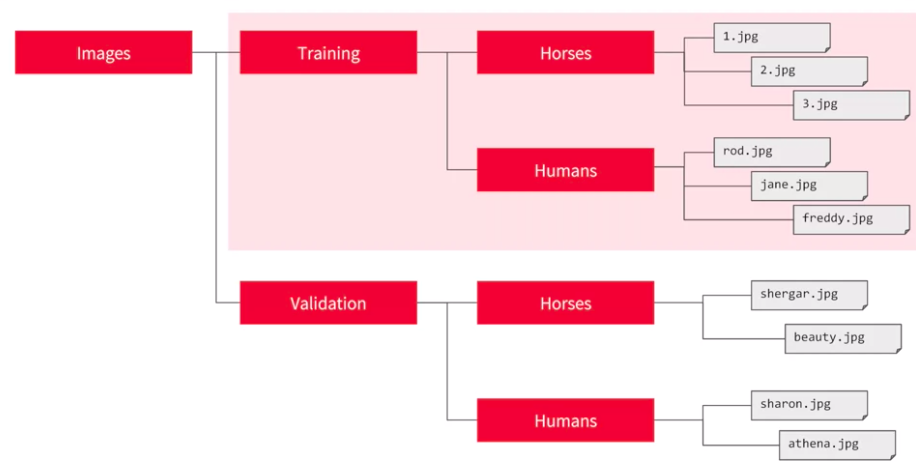

In [11]:
Image('label.png', width = 800)

In [0]:
#Image generator class
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Few things need to pay attenton

1.   Should get load image <span style="background-color:#FFFF00"> from that directory and its subdirectory</span>. It is a common mistake that point the generator at the subdirectory, It will fail in that circumstance.
2. Should point at the directory that contain subdirectory that contain images. 
3. The name for subdirectory is the label for you image
4. image for the neural network should has the **same size**
5. training and validation data are loade on **batches** More efficient than one by one

In [0]:
#train generator
train_datagen = ImageDataGenerator(rescale = 1./255) #pass rescale to normalize the data
train_generator = train_datagen.flow_from_directory( 
                                   train_dir, 
                                   target_size = (300,300),
                                   batch_size = 128, 
                                   class_mode = 'binary')

In [0]:
#validation generator 
test_datagen = ImageDataGenerator(rescale = 1./255) #pass rescale to normalize the data
test_generator = test_datagen.flow_from_directory( 
                                   validation_dir, 
                                   target_size = (300,300),
                                   batch_size = 32, 
                                   class_mode = 'binary')

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', 
                          input_shape = (300, 300, 3)),  #color images not greyscale 3 bytes per pixel, one for red, green, and blue                                              
    tf.keras.layers.MaxPooling2D(2,2),                    
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),                                                 
    tf.keras.layers.MaxPooling2D(2,2),                    
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),                                                 
    tf.keras.layers.MaxPooling2D(2,2),                            
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(1,activation='sigmoid')  #only generate binary classification

])

Summary, If without convolution, will be 300* 300 = 90,000 values, in end we only have 78,400 with convolution

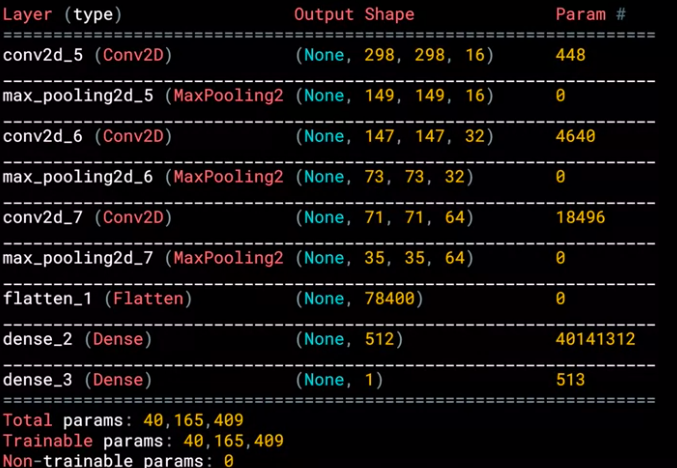

In [18]:
Image('complex_conv.png', width = 600)

In [0]:
from tensorflow.keras.optimizers import RMSprop

In [0]:
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr = 0.001), metrics = ['acc']) #lr is learning rate
history = model.fit_generator(   #not call model.fit instead call model.fit_generator
    train_generator, #setup eariler
    steps_per_epoch = 8, #there are 1024 images in train directory, we loading 128 at a time, in order to load them all, need 8 batches
    epochs = 15,
    validation_data = validation_generator,
    validation_steps = 8, #there are 256 images, handle them in batches of 32, so do 8 steps
    verbose = 2) #verbose specifies how much to display while training is going on,
    # with verbose = 2 we get little less animation hiding the epoch progress

In [0]:
import numpy as np 
from google.colab import files
from keras.preprocessing import image
upload = files.upload() # can update multiple images at a time 

for fn in uploaded.keys(): # loop iterates through all of images in that collections. And you can load an iamge and prepare to input
  path = '/content/' + fn
  img = image.load_img(path,target_size = (300,300)) 
  x = image.img_to_array(img)  #ensure that the dimensions match the input dimension specified when desgined the model
  x = np.expand_dims(x, axis = 0)

  images  = np.vstack(x)
  classes = model.predict(images, batch_size = 10) # return a array of classes
  print(classes[0])
  if classes[0] > 0.5: 
    print (fn + " is a human")
  else 
    print (fn + " is a horse")